# Практическое задание №6

- Построить корреляционную матрицу по метрическим показателям и найти наиболее значимую корреляцию. Для этого случая построить двумерную диаграмму. Применить модель множественной регрессии для зависимой переменной индекс МТ детский и независимыми переменными: возраст, рост, вес, имт, диастолический размер левого желудочка, фракция выброса. Определить значимость прогноза и наиболее значимые переменные.
- Факторный анализ. Проинтерпретировать главные компоненты, определить вклад первых двух в общую дисперсию и построить двумерную диаграмму первых двух факторов.
- Дискриминантный анализ. Выяснить возможности классификации детей с разными формами ожирения.

In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.decomposition import FactorAnalysis

In [2]:
import warnings
warnings.filterwarnings('ignore')

Считаем данные:

In [3]:
df = pd.read_csv("dataX.csv")

In [4]:
df.head()

,Unnamed: 0,Sex,Age,Половое.развитие..0...допубертатное..1..отставание..2...норма..3...опережение,liv,eye,sss,kidneys,OL,рост.см.,вес.кг.,ИМТ,Z.Score_Height.ageWHO,LZ_KDR,FV_Tejh
0,1,1,13.5863,NaN,0,0,0,0,2,177.0,87.6,27.9613,2.20,NaN,NaN
1,2,1,12.0630,NaN,0,0,0,0,3,155.5,69.1,28.5770,0.85,NaN,NaN
2,3,2,10.3890,NaN,0,0,0,0,1,144.5,43.2,20.6894,0.53,NaN,NaN
3,4,1,10.8301,0.0,1,1,1,0,4,156.0,79.0,32.4622,2.08,50.0,64.0
4,5,1,12.1370,NaN,0,1,0,0,2,170.0,73.1,25.2941,2.82,46.0,66.0


**Построим корреляционную матрицу:**

In [5]:
corr_matrix = df.corr()

In [6]:
corr_matrix

,Unnamed: 0,Sex,Age,Половое.развитие..0...допубертатное..1..отставание..2...норма..3...опережение,liv,eye,sss,kidneys,OL,рост.см.,вес.кг.,ИМТ,Z.Score_Height.ageWHO,LZ_KDR,FV_Tejh
Unnamed: 0,1.000000,0.034425,0.003784,-0.142768,0.103585,0.027514,-0.080282,-0.019176,0.099036,-0.049428,0.061704,0.111547,-0.041314,-0.060257,0.087975
Sex,0.034425,1.000000,-0.112849,0.190668,-0.130160,-0.084043,-0.076839,0.000679,-0.166760,-0.289472,-0.208539,-0.058742,-0.123765,-0.237494,0.042110
Age,0.003784,-0.112849,1.000000,0.533367,0.073734,0.066276,0.240987,0.025659,-0.300890,0.789528,0.595024,0.245941,-0.225813,0.365573,-0.000410
Половое.развитие..0...допубертатное..1..отставание..2...норма..3...опережение,-0.142768,0.190668,0.533367,1.000000,-0.098582,-0.133962,0.057401,-0.038927,-0.361037,0.486135,0.179783,-0.074427,-0.067040,0.198478,0.194834
liv,0.103585,-0.130160,0.073734,-0.098582,1.000000,0.564680,0.478577,0.206013,0.162617,0.056403,0.164244,0.182124,0.014491,0.132243,-0.071290
eye,0.027514,-0.084043,0.066276,-0.133962,0.564680,1.000000,0.478544,0.029820,0.121604,0.041182,0.125565,0.150417,0.021748,0.083806,-0.131105
sss,-0.080282,-0.076839,0.240987,0.057401,0.478577,0.478544,1.000000,0.086366,-0.001554,0.192291,0.179694,0.107535,0.014639,0.179467,-0.107286
kidneys,-0.019176,0.000679,0.025659,-0.038927,0.206013,0.029820,0.086366,1.000000,-0.077157,-0.031652,-0.022268,-0.019167,-0.093533,0.014234,-0.007402
OL,0.099036,-0.166760,-0.300890,-0.361037,0.162617,0.121604,-0.001554,-0.077157,1.000000,-0.181846,0.474578,0.787745,0.155595,0.243537,0.048460
рост.см.,-0.049428,-0.289472,0.789528,0.486135,0.056403,0.041182,0.192291,-0.031652,-0.181846,1.000000,0.700450,0.228837,0.355684,0.530800,0.017995


In [7]:
max_corr = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
print(max_corr)

Unnamed: 0                                                                     Unnamed: 0               1.000000
ИМТ                                                                            вес.кг.                  0.845523
рост.см.                                                                       Age                      0.789528
OL                                                                             ИМТ                      0.787745
вес.кг.                                                                        рост.см.                 0.700450
                                                                                                          ...   
Age                                                                            Z.Score_Height.ageWHO   -0.225813
LZ_KDR                                                                         Sex                     -0.237494
Sex                                                                            рост.см.         

Наиболее значимая корреляция ИМТ - вес

**Построим двумерную диаграмму:**

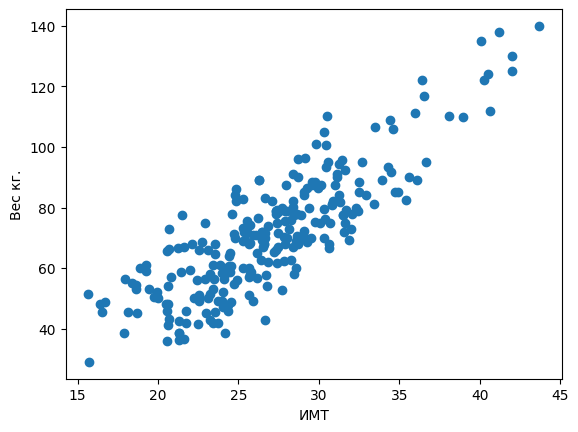

In [8]:
plt.scatter(df["ИМТ"], df["вес.кг."])
plt.xlabel("ИМТ")
plt.ylabel("Вес кг.")
plt.show()

Видим сильную линейную зависимость

**Множественная регрессия**

Разделим зависимую и независимые переменные

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 15 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Unnamed: 0                                                                     253 non-null    int64  
 1   Sex                                                                            253 non-null    int64  
 2   Age                                                                            253 non-null    float64
 3   Половое.развитие..0...допубертатное..1..отставание..2...норма..3...опережение  97 non-null     float64
 4   liv                                                                            253 non-null    int64  
 5   eye                                                                            253 non-null    int64  
 6   sss                       

In [14]:
df.drop(["Половое.развитие..0...допубертатное..1..отставание..2...норма..3...опережение"], axis=1, inplace=True)

In [15]:
dfn = df.dropna()

In [17]:
Y = dfn["Z.Score_Height.ageWHO"]
X = dfn[["Age", "рост.см.", "вес.кг.", "ИМТ", "LZ_KDR", "FV_Tejh"]]

In [18]:
X = sm.add_constant(X)

In [19]:
model = sm.OLS(Y, X).fit()

In [20]:
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Z.Score_Height.ageWHO   R-squared:                       0.783
Model:                               OLS   Adj. R-squared:                  0.772
Method:                    Least Squares   F-statistic:                     73.84
Date:                   Sun, 24 Sep 2023   Prob (F-statistic):           2.08e-38
Time:                           17:07:40   Log-Likelihood:                -88.386
No. Observations:                    130   AIC:                             190.8
Df Residuals:                        123   BIC:                             210.8
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.9203 

Переменные возраст и рост являются статистически значимыми. Остальные независимые переменные не оказывают значимого влияния на зависимую переменную. Модель объясняет более 78% дисперсии зависимой переменной.

## Факторный анализ

In [51]:
X = dfn[["Age", "рост.см.", "вес.кг.", "ИМТ", "LZ_KDR", "FV_Tejh"]]
fa = FactorAnalysis(n_components=2)
fa.fit(X)

FactorAnalysis(n_components=2)

In [88]:
loading_1 = []
loading_2 = []

In [57]:
factors = fa.transform(X)

In [89]:
for name in X.columns:
    loading_1.append(np.corrcoef(factors[:,0], X[name])[0,1])
    loading_2.append(np.corrcoef(factors[:,1], X[name])[0,1])

In [91]:
loading_1 = np.array(loading_1)
loading_2 = np.array(loading_2)

Матрица факторных нагрузок

In [97]:
loadings = np.concatenate((loading_1, loading_2), axis=0)
print(loadings)

[ 0.43561276  0.60772816  0.99878867  0.85563597  0.60566046  0.10282133
  0.5648033   0.79334807 -0.04441721 -0.51119171  0.21073221 -0.05644073]


- Первый фактор: переменная вес и ИМТ имеют высокие факторные нагрузки
- Второй фактор: самую высокую факторную нагрузку имеет переменная рост

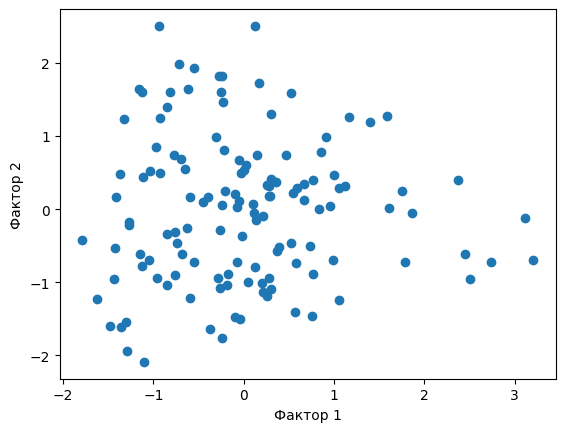

In [56]:
plt.scatter(factors[:, 0], factors[:, 1])
plt.xlabel('Фактор 1')
plt.ylabel('Фактор 2')
plt.show()

График показывает отсутствие взаимодействия между факторами

## Дискриминантный анализ

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
y = dfn["Sex"]
X = dfn.drop("Sex", axis=1)

In [32]:
X.drop(X.columns[[0]], axis=1, inplace=True)

Разделим выборку на обучающую и тестовую

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [45]:
y_pred = lda.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8461538461538461


Матрица классификаций

In [47]:
confusion_matrix(y_test, y_pred)

array([[16,  2],
       [ 2,  6]])

В 84.5% случаев модель правильно классифицирует тестовые данные

In [49]:
discriminant_values = lda.transform(X)

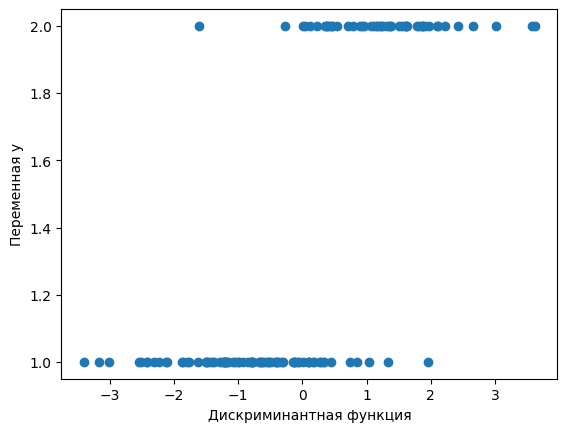

In [50]:
plt.scatter(discriminant_values, y)
plt.xlabel('Дискриминантная функция')
plt.ylabel('Переменная y')
plt.show()